## Data Analysis Python Project - Blinkit Analysis

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import Raw Data

In [2]:
df = pd.read_csv("blinkit_data.csv")

#### Sample Data

In [3]:
df.head(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [4]:
df.tail(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


#### Size of  Data

In [5]:
print("Size of Data :", df.shape)

Size of Data : (8523, 12)


#### Field Info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### Data Cleaning

In [7]:
print(df["Item Fat Content"].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [8]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

In [9]:
print(df["Item Fat Content"].unique())

['Regular' 'Low Fat']


#### Business Requirements

#### KPI's Requirements

In [10]:
#Total Sales
Total_sales = df['Sales'].sum()

#Average Sales
Avg_sales = df['Sales'].mean()

#Number of items sold
No_of_items_sold = df['Sales'].count()

#Average ratings
Avg_ratings = df['Rating'].mean()

#Display KPI's

print(f"Total sales: ${Total_sales:,.1f}")
print(f"Average sales: ${Avg_sales:,.0f}")
print(f"No of items sold: ${No_of_items_sold:,.0f}")
print(f"Average ratings: ${Avg_ratings:,.1f}")

Total sales: $1,201,681.5
Average sales: $141
No of items sold: $8,523
Average ratings: $4.0


## Charts Requirements

#### Total Sales by Fat Content

In [11]:
sales_by_fat = df['Item Fat Content'].value_counts()

In [12]:
sales_by_fat

Item Fat Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

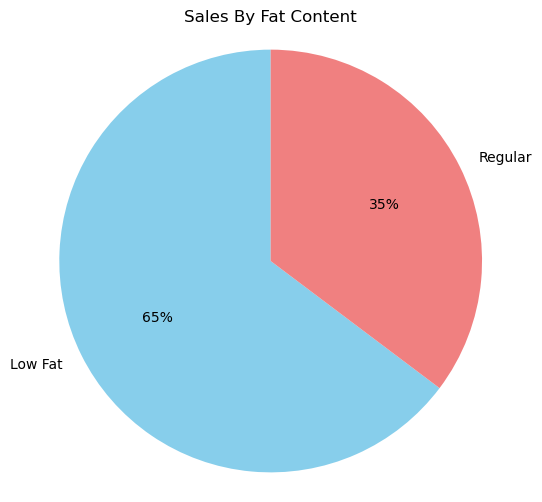

In [13]:
# Plotting the pie chart
plt.figure(figsize=(6,6))
plt.pie(sales_by_fat, labels=sales_by_fat.index, autopct='%1.0f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Sales By Fat Content')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

#### Total Sales By Item Type

In [14]:
print(df["Item Type"].unique())

['Fruits and Vegetables' 'Health and Hygiene' 'Frozen Foods' 'Canned'
 'Soft Drinks' 'Household' 'Snack Foods' 'Meat' 'Breads' 'Hard Drinks'
 'Others' 'Dairy' 'Breakfast' 'Baking Goods' 'Seafood' 'Starchy Foods']


In [15]:
# Group by Item Type and sum the sales
sales_by_item_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

In [16]:
sales_by_item_type

Item Type
Fruits and Vegetables    178124.0810
Snack Foods              175433.9204
Household                135976.5254
Frozen Foods             118558.8814
Dairy                    101276.4596
Canned                    90706.7270
Baking Goods              81894.7364
Health and Hygiene        68025.8388
Meat                      59449.8638
Soft Drinks               58514.1650
Breads                    35379.1198
Hard Drinks               29334.6766
Others                    22451.8916
Starchy Foods             21880.0274
Breakfast                 15596.6966
Seafood                    9077.8700
Name: Sales, dtype: float64

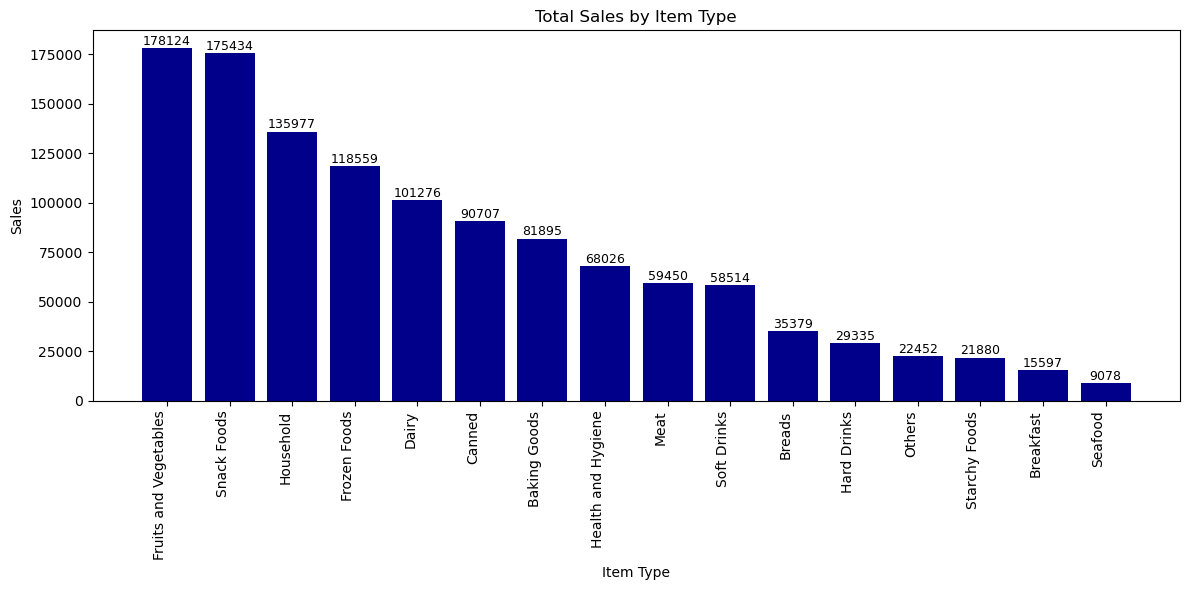

In [17]:
# Group and sum sales
sales_by_item_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(sales_by_item_type.index, sales_by_item_type.values, color='darkblue')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 100, f'{height:.0f}', 
            ha='center', va='bottom', fontsize=9)

# Labels and title
ax.set_title('Total Sales by Item Type')
ax.set_xlabel('Item Type')
ax.set_ylabel('Sales')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

#### Fat Content by Outlet for Total Sales

In [18]:
print(df["Outlet Type"].unique())

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


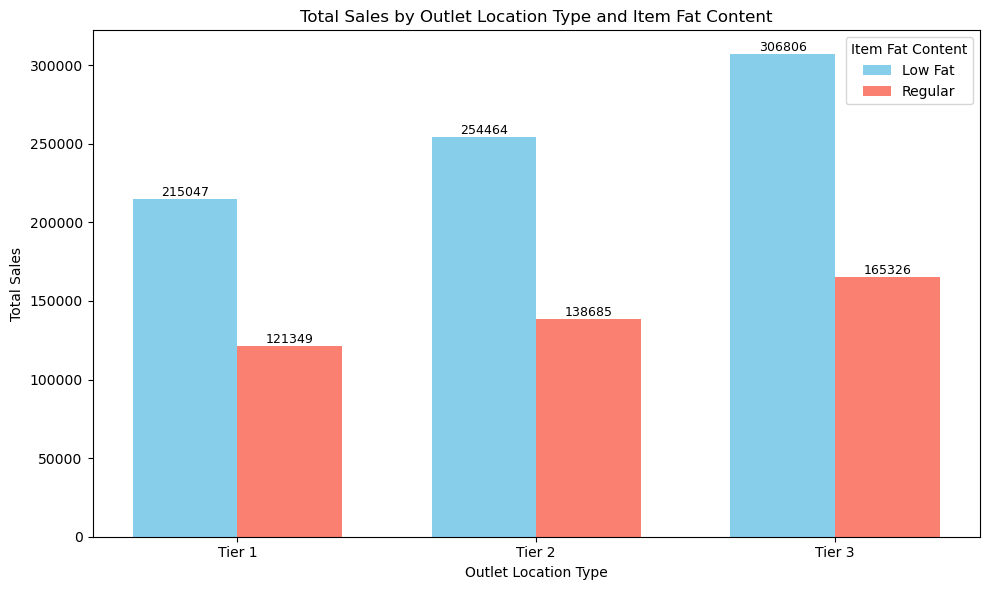

In [19]:
# Step 1: Aggregate total sales by Outlet Location Type and Item Fat Content
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack(fill_value=0)

# Step 2: Plot grouped (side-by-side) bars
labels = grouped.index
low_fat = grouped['Low Fat']
regular = grouped['Regular']

x = np.arange(len(labels))  # the label locations
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - bar_width/2, low_fat, bar_width, label='Low Fat', color='skyblue')
bar2 = ax.bar(x + bar_width/2, regular, bar_width, label='Regular', color='salmon')

# Add value labels on bars
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 100, f'{int(height)}',
                ha='center', va='bottom', fontsize=9)

# Final touches
ax.set_xlabel('Outlet Location Type')
ax.set_ylabel('Total Sales')
ax.set_title('Total Sales by Outlet Location Type and Item Fat Content')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

#### Total Sales by Outlet Establishment

In [20]:
print(df["Outlet Establishment Year"].unique())

[2012 2022 2010 2000 2015 2020 2011 1998 2017]


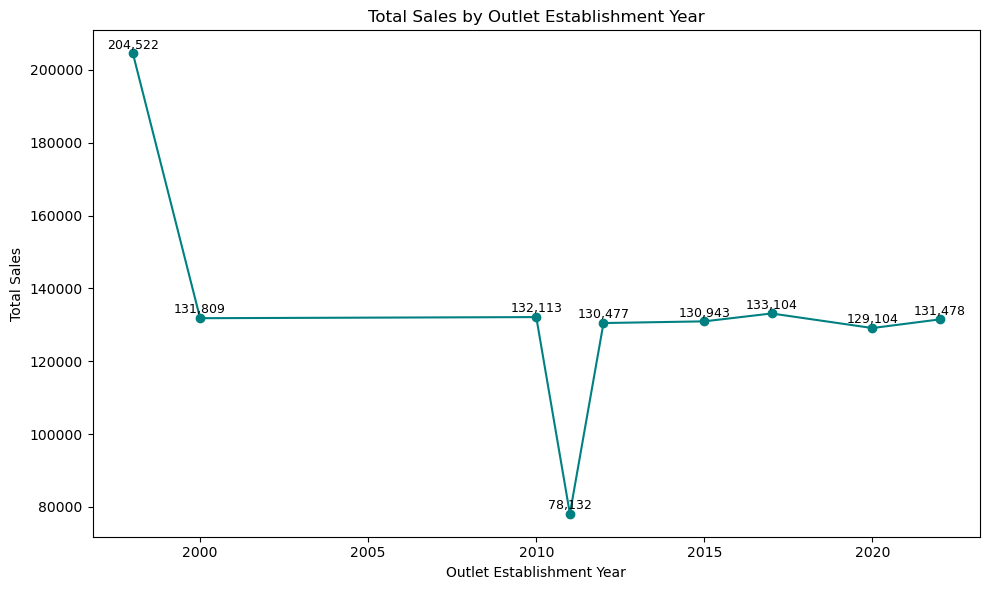

In [21]:
# Group sales by year
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-', color='teal')

# Annotate values on the line
for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y + 500, f'{y:,.0f}', ha='center', va='bottom', fontsize=9)

# Labels and title
plt.title('Total Sales by Outlet Establishment Year')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.grid(False)
plt.tight_layout()
plt.show()

#### Sales by Outlet Size

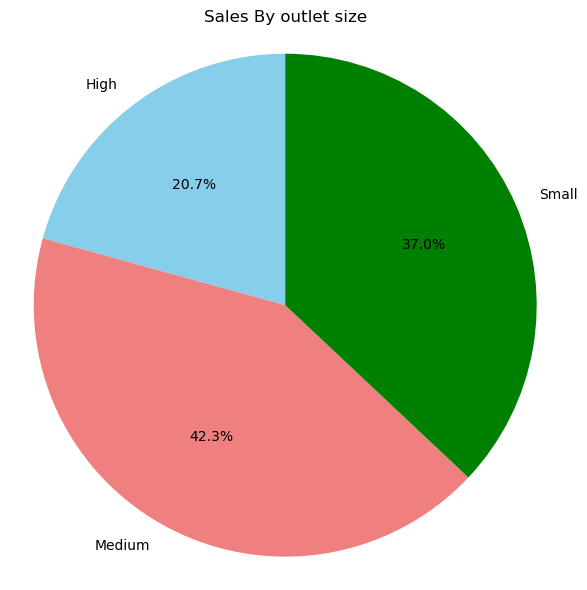

In [22]:
# Plotting the pie chart
Sales_by_outlet_size = df.groupby('Outlet Size')['Sales'].sum()
plt.figure(figsize=(6,6))
plt.pie(Sales_by_outlet_size, labels=Sales_by_outlet_size.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'green'])
plt.title('Sales By outlet size')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.tight_layout()
plt.show()

#### Sales by Outlet Location

In [23]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


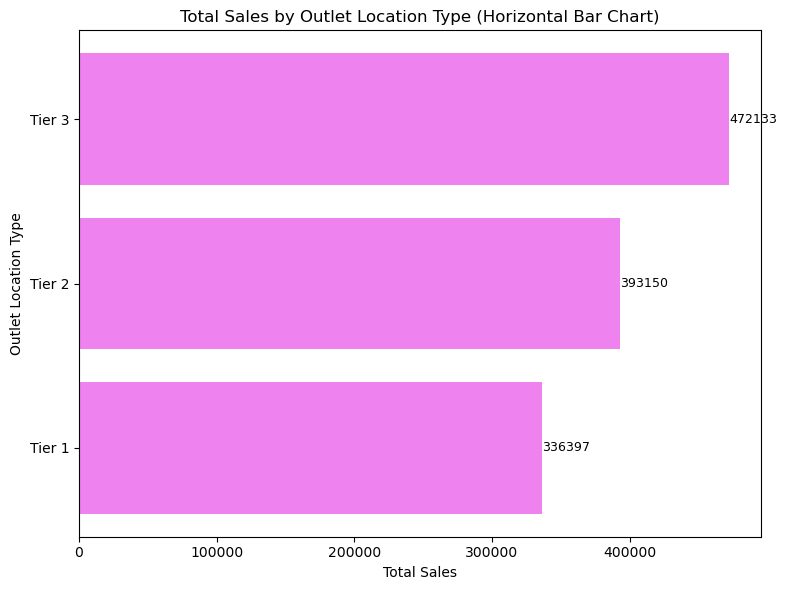

In [24]:
# Group total sales by Outlet Location Type
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum()

# Sort for better visuals (optional)
sales_by_location = sales_by_location.sort_values()

# Plot horizontal bar chart
plt.figure(figsize=(8, 6))
bars = plt.barh(sales_by_location.index, sales_by_location.values, color='violet')

# Add value labels to bars
for bar in bars:
    plt.text(bar.get_width() + 100, bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}', va='center', fontsize=9)

# Labels and title
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')
plt.title('Total Sales by Outlet Location Type (Horizontal Bar Chart)')
plt.tight_layout()
plt.show()